In [1]:
from DP.linear_solver import LinearSolver
from DP.pga_edges_modified_objective import PGAModifiedEdgeTraversal
from DP.DP_tester import DP_tester
from DP.utils import (
    print_matrix,
    binom_optimal_privacy,
    fisher_information_privatized,
    reduce_optimal_matrix
)
import numpy as np

In [2]:
N = 10
EPSILON = 1.0
THETA = 0.01

opt_q, status, history, best_fisher = binom_optimal_privacy(PGAModifiedEdgeTraversal(), N, EPSILON, THETA)
print_matrix(reduce_optimal_matrix(opt_q))
print(status)
print(best_fisher)
print("==================")

opt_q, _, _, best_fisher = binom_optimal_privacy(LinearSolver(), N, EPSILON, THETA)
print_matrix(opt_q)
print(best_fisher)

row 0: 0.13187614781434534	0.35847470848543284	0.3584987212100228	0.35848373846182613	0.19752995186988892	0.23264325760104992	0.24000871354574307	0.24223838341781226	0.20881151625872704	0.19684717656502584	0.2304104725310021
row 1: 1.2829885398536226e-05	7.533672696208567e-05	2.8529344599462847e-05	7.22383037748826e-05	2.7366795501055357e-05	2.7090712674929263e-05	2.7090712693567712e-05	2.7090712707038063e-05	2.70907127205696e-05	2.7090712734020948e-05	2.7090712747677488e-05
row 2: 0.16263836822825342	0.05983957108179739	0.05982863823071589	0.05983289014690416	0.14731412381863418	0.15326914868650715	0.1533610526573234	0.15336171141253602	0.1533615915547181	0.15336050744406735	0.1533614228671591
row 3: 0.008401976741524533	0.0030941311236973392	0.003098624462391187	0.003088013481054007	0.004069934105378365	0.00801860541582548	0.008072726167459807	0.008073251214202935	0.008073279937858741	0.008073372633819633	0.008073309645380767
row 4: 0.3887672721727967	0.1430277244498142	0.14301689939

4it [00:05,  1.30s/it]


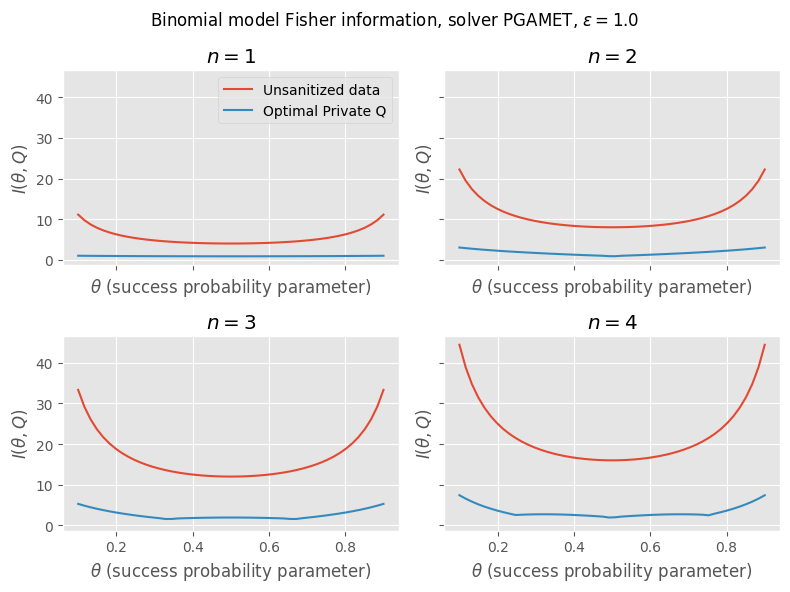

In [3]:
DP_tester.plot_fisher_infos(PGAModifiedEdgeTraversal(), ns=[1, 2, 3, 4], epsilon=1.0)

  2%|▏         | 1/50 [00:00<00:20,  2.44it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [00:15<00:00,  3.13it/s]

[]


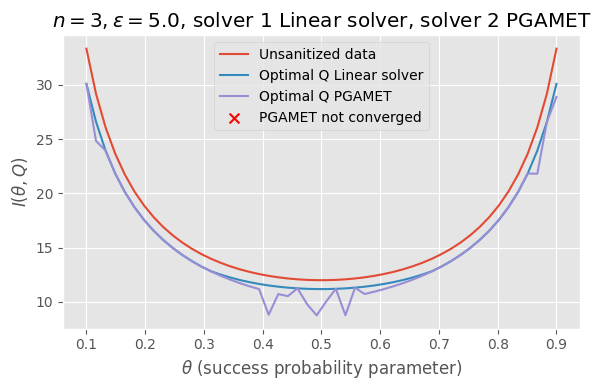

In [4]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAModifiedEdgeTraversal(), 3, 5.0)

Calculating for PGAMET


 16%|█▌        | 8/50 [00:00<00:02, 15.71it/s]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|██████████| 50/50 [00:01<00:00, 25.36it/s]


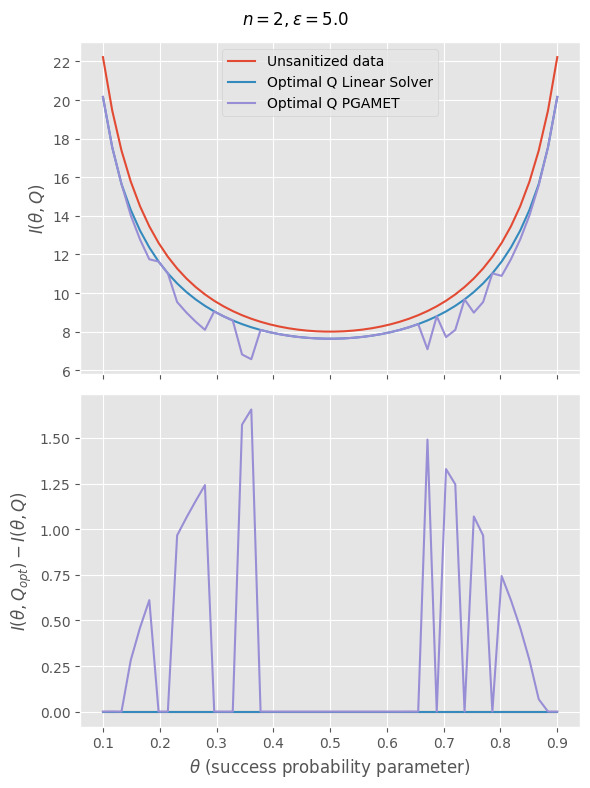

In [6]:
DP_tester.compare_fisher_multiple_solvers([PGAModifiedEdgeTraversal()], 2, 5.0)

100%|██████████| 50/50 [00:37<00:00,  1.33it/s]

[]


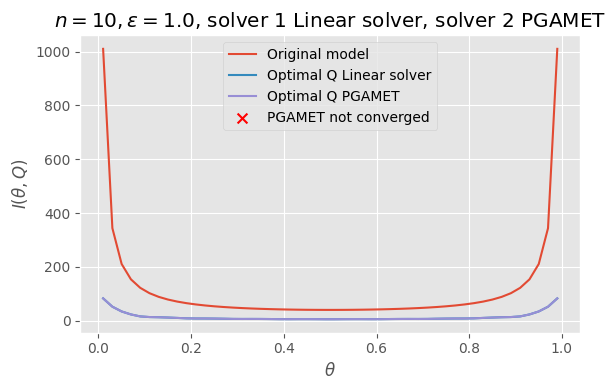

In [3]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAModifiedEdgeTraversal(), 10, 1.0)

100%|██████████| 50/50 [00:30<00:00,  1.65it/s]

[0.13]


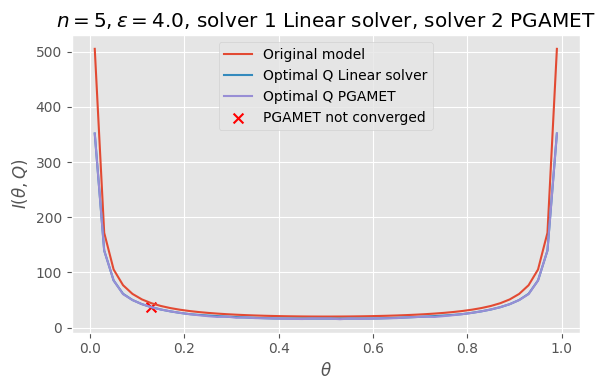

In [5]:
DP_tester.compare_fisher_two_solvers(LinearSolver(), PGAModifiedEdgeTraversal(), 5, 4.0)

0it [00:00, ?it/s]

1it [00:01,  1.60s/it]/Users/matej.vedak/Desktop/University of Vienna/Lukas master thesis/locally_efficient_differential_privacy/venv/lib/python3.12/site-packages/cvxpy/problems/problem.py:1407: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
10it [32:58, 197.85s/it]


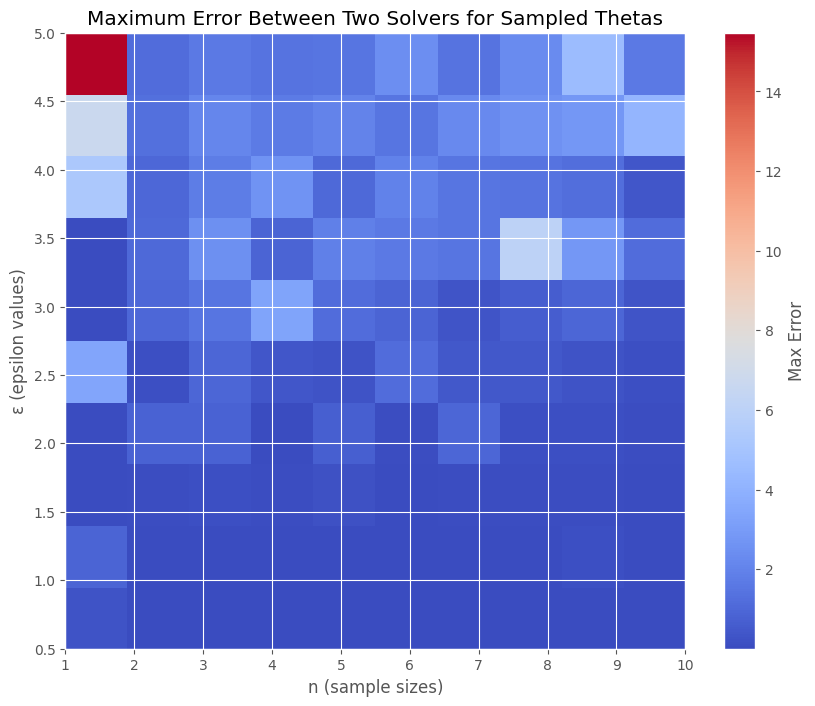

In [11]:
results = DP_tester.max_discrepancy_between_two_solvers(
    LinearSolver(), 
    PGAModifiedEdgeTraversal(), 
    np.arange(10) + 1, 
    [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0], 
    sampled_thetas=20
)

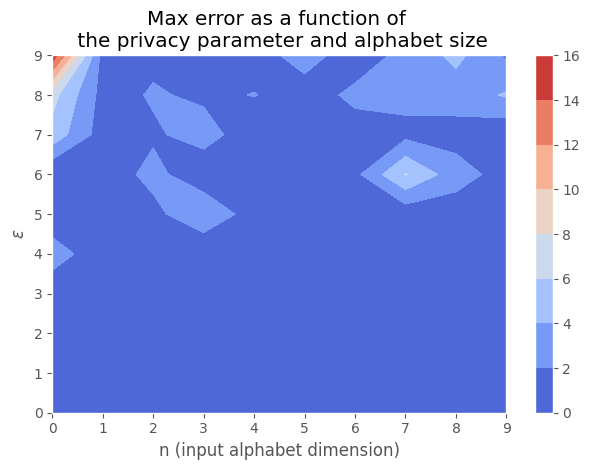

In [13]:
import matplotlib.pyplot as plt

plt.contourf(results.T, cmap="coolwarm")
plt.colorbar()
plt.xlabel("n (input alphabet dimension)")
plt.ylabel(r"$\epsilon$")
plt.title("Max error as a function of \n the privacy parameter and alphabet size")
plt.tight_layout()
plt.show()

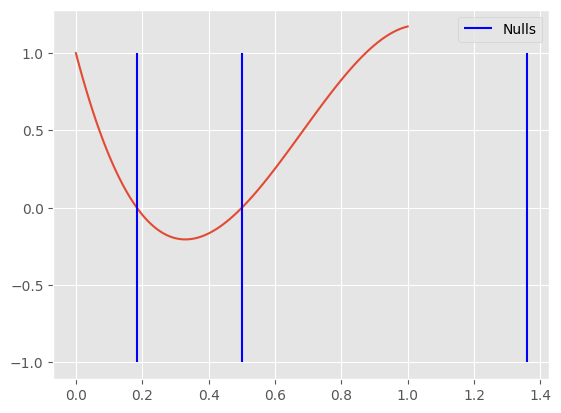

In [26]:
vals = np.linspace(0, 1, 100)

def f(ys, x):
    return -(ys / x - np.exp(-1)) * (ys / x - 1) * (ys / x - np.exp(1))

plt.plot(vals, f(vals, 0.5))
plt.vlines([np.exp(-1)*0.5, 0.5, np.exp(1)*0.5], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

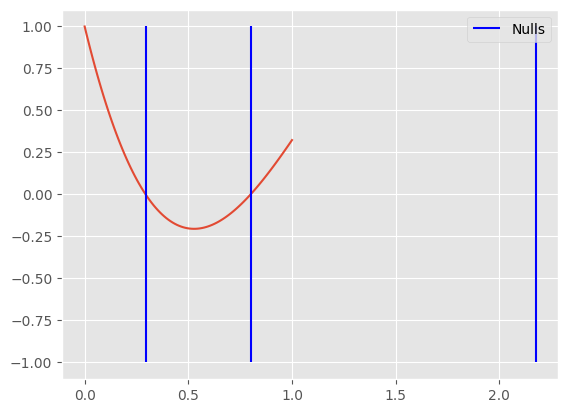

In [27]:
vals = np.linspace(0, 1, 100)

def f(ys, x):
    return -(ys / x - np.exp(-1)) * (ys / x - 1) * (ys / x - np.exp(1))

plt.plot(vals, f(vals, 0.8))
plt.vlines([np.exp(-1)*0.8, 0.8, np.exp(1)*0.8], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

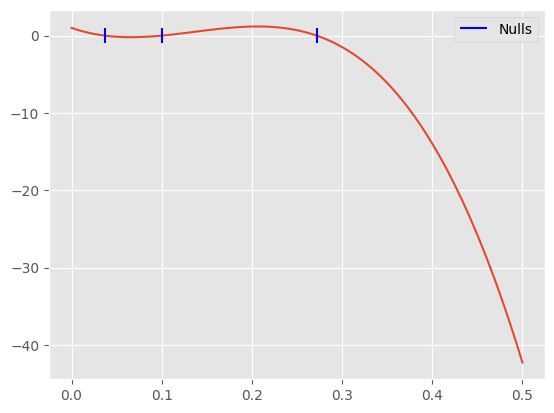

In [29]:
vals = np.linspace(0, 0.5, 100)

def f(ys, x):
    return -(ys / x - np.exp(-1)) * (ys / x - 1) * (ys / x - np.exp(1))

plt.plot(vals, f(vals, 0.1))
plt.vlines([np.exp(-1)*0.1, 0.1, np.exp(1)*0.1], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

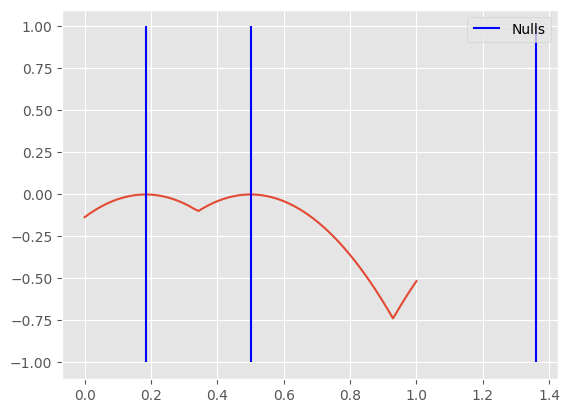

In [34]:
def logsum(vals, x, sigma=1e-3):
    return +sigma * np.log(
        np.exp(-(vals/x - np.exp(-1))**2/sigma) + 
        np.exp(-(vals/x - 1)**2/sigma) + 
        np.exp(-(vals/x - np.exp(1))**2/sigma))

vals = np.linspace(0, 1, 100)

plt.plot(vals, logsum(vals, 0.5))
plt.vlines([np.exp(-1)*0.5, 0.5, np.exp(1)*0.5], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()

/var/folders/lv/9hw1_pzj1hs5c2glqrzn04m80000gq/T/ipykernel_43422/2608740757.py:2: RuntimeWarning: divide by zero encountered in log
  return +sigma * np.log(


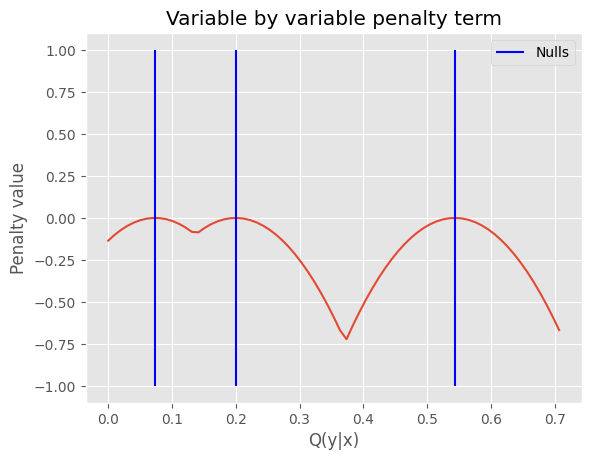

In [38]:
vals = np.linspace(0, 1, 100)

plt.plot(vals, logsum(vals, 0.2))
plt.vlines([np.exp(-1)*0.2, 0.2, np.exp(1)*0.2], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.ylabel("Penalty value")
plt.xlabel("Q(y|x)")
plt.title("Variable by variable penalty term")
plt.show()

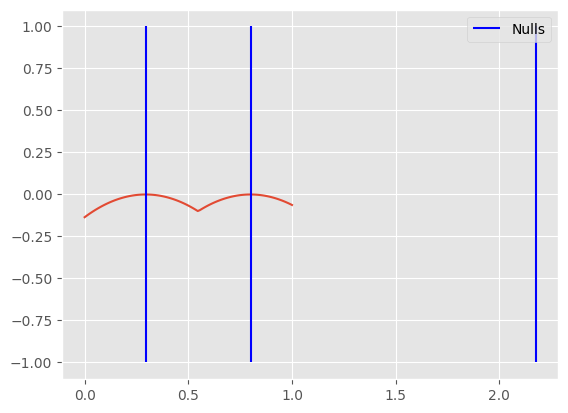

In [36]:
vals = np.linspace(0, 1, 100)

plt.plot(vals, logsum(vals, 0.8))
plt.vlines([np.exp(-1)*0.8, 0.8, np.exp(1)*0.8], -1, 1, colors="blue", label="Nulls")
plt.legend()
plt.show()